# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors
import seaborn as sns
import copy

filepath = 'C:/Users/Tim/desktop/lighthouse/w7/d4/'
file = 'data.csv'
df = pd.read_csv(filepath + file) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [204]:
data=copy.deepcopy(df)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [205]:
def info(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    dtype = x.dtypes
    count = x.count()
    missing_ = pd.concat([n_missing, p_missing, dtype, count],axis=1, keys = [
        'number_missing',
        'percent_missing',
        'type',
        'count'
    ])
    return missing_
info(df)

,number_missing,percent_missing,type,count
Credit_History,50,0.081433,float64,564
Self_Employed,32,0.052117,object,582
LoanAmount,22,0.035831,float64,592
Dependents,15,0.024430,object,599
Loan_Amount_Term,14,0.022801,float64,600
Gender,13,0.021173,object,601
Married,3,0.004886,object,611
Loan_Status,0,0.000000,object,614
Property_Area,0,0.000000,object,614
CoapplicantIncome,0,0.000000,float64,614


Look at some basic statistics for numerical variables.

In [206]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)

categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical.remove('Loan_ID')

In [6]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [7]:
df.groupby('Credit_History')['Loan_Status'].count()

Credit_History
0.0     89
1.0    475
Name: Loan_Status, dtype: int64

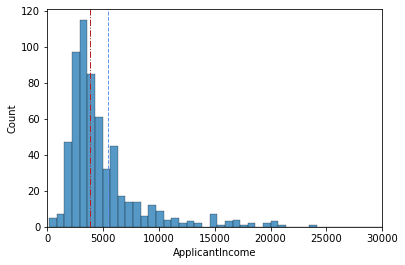

In [8]:
fig, ax = plt.subplots()
sns.histplot(df['ApplicantIncome'],ax=ax)
plt.axvline(df['ApplicantIncome'].mean(), 
            color='cornflowerblue', 
            linestyle='dashed', 
            linewidth=1,
            label='mean')
plt.axvline(df['ApplicantIncome'].median(), 
            color='firebrick', 
            linestyle='dashdot', 
            linewidth=1,
            label='median')
ax.set_xlim(0,30000)
plt.show()

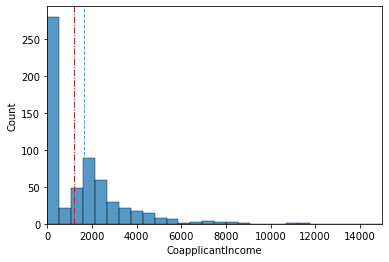

In [9]:
fig, ax = plt.subplots()
sns.histplot(df['CoapplicantIncome'],ax=ax)
plt.axvline(df['CoapplicantIncome'].mean(), 
            color='cornflowerblue', 
            linestyle='dashed', 
            linewidth=1,
            label='mean')
plt.axvline(df['CoapplicantIncome'].median(), 
            color='firebrick', 
            linestyle='dashdot', 
            linewidth=1,
            label='median')
ax.set_xlim(0,15000)
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [10]:
for i in categorical:
    print(df[i].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [11]:
for j in categorical:
    nuniques = df[j].value_counts()
    print(nuniques)

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

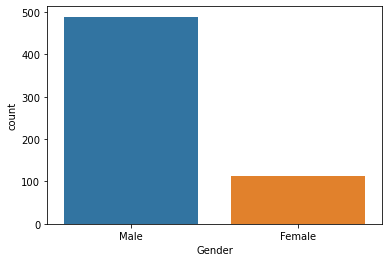

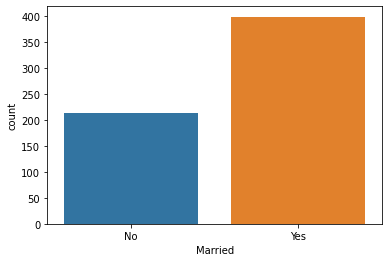

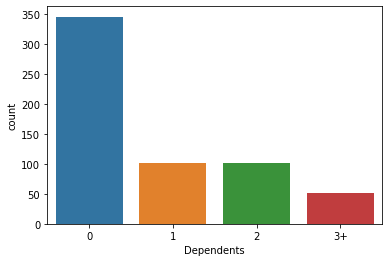

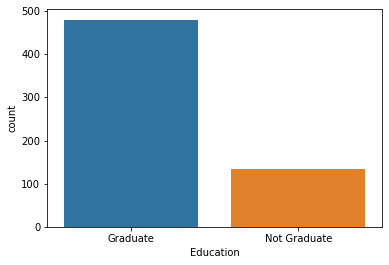

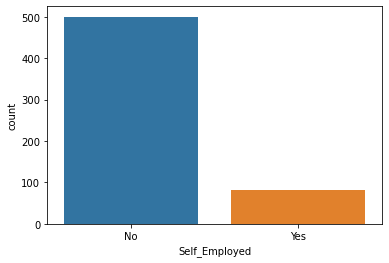

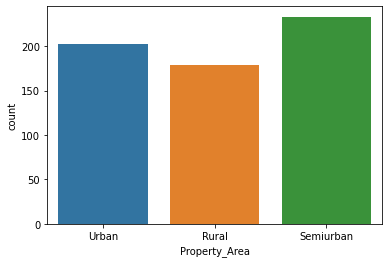

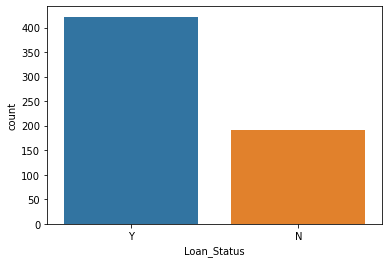

In [12]:
for j in categorical:
    sns.countplot(x=df[j])
    plt.show()

In [13]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

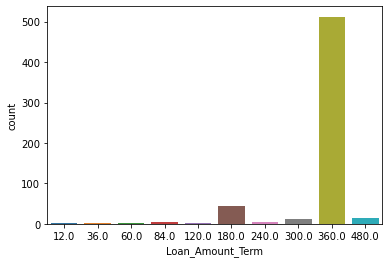

In [14]:
sns.countplot(x=df['Loan_Amount_Term'])

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



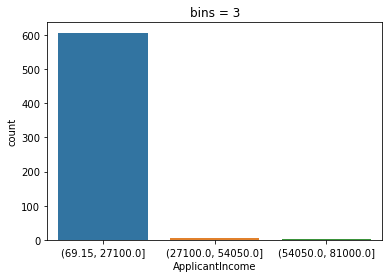

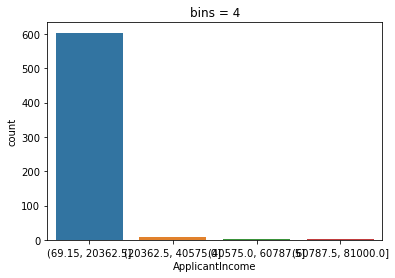

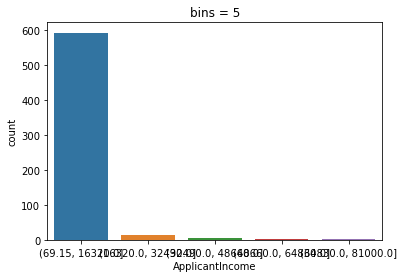

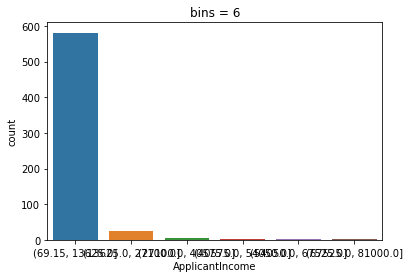

In [15]:
# fig, ax =plt.subplots(4,1)
for i in range(3,7):
    sns.countplot(x=pd.cut(df['ApplicantIncome'],bins=i)).set_title('bins = {}'.format(i))
    plt.show()

# binned_app_inc = pd.cut(df['ApplicantIncome'],bins=4)    
# sns.countplot(x=binned_app_inc)


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

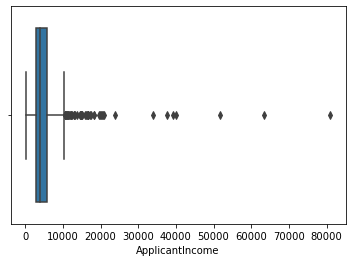

In [16]:
sns.boxplot(x='ApplicantIncome', data=df)

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

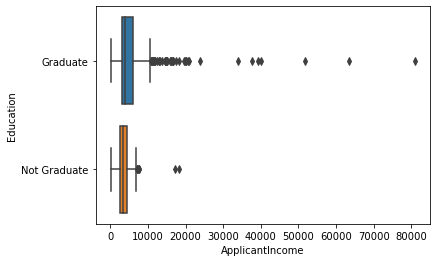

In [17]:
sns.boxplot(y='Education',x='ApplicantIncome',data=df)

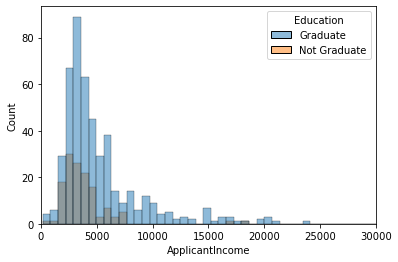

In [18]:
fig, ax = plt.subplots()
sns.histplot(x=df['ApplicantIncome'],hue=df['Education'])
ax.set_xlim(0,30000)
plt.show()

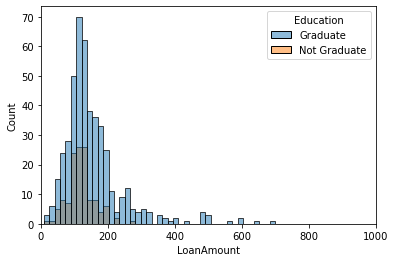

In [148]:
fig, ax = plt.subplots()
sns.histplot(x=df['LoanAmount'],hue=df['Education'])
ax.set_xlim(0,1000)
plt.show()

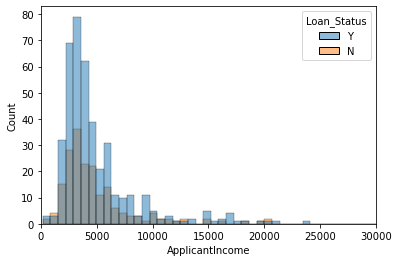

In [3]:
fig, ax = plt.subplots()
sns.histplot(x=df['ApplicantIncome'],hue=df['Loan_Status'])
ax.set_xlim(0,30000)
plt.show()

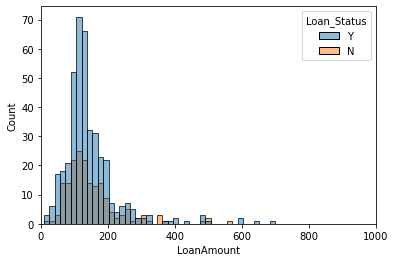

In [4]:
fig, ax = plt.subplots()
sns.histplot(x=df['LoanAmount'],hue=df['Loan_Status'])
ax.set_xlim(0,1000)
plt.show()

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

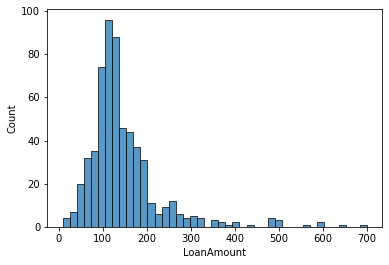

In [19]:
sns.histplot(x=df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

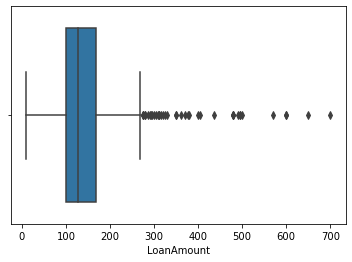

In [20]:
sns.boxplot(x='LoanAmount',data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

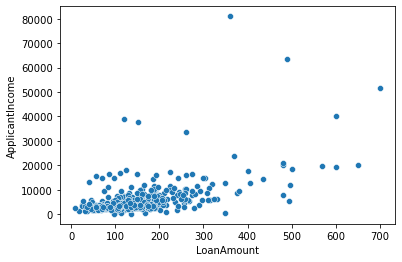

In [21]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

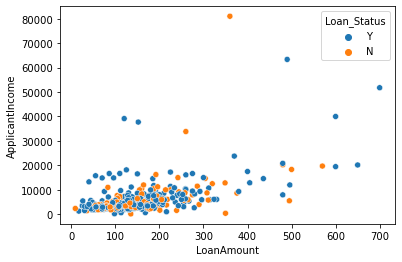

In [294]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

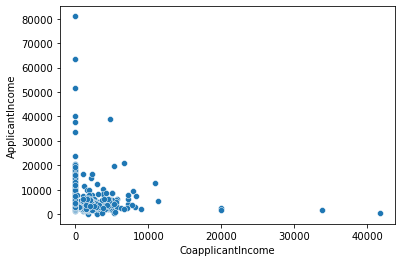

In [22]:
sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

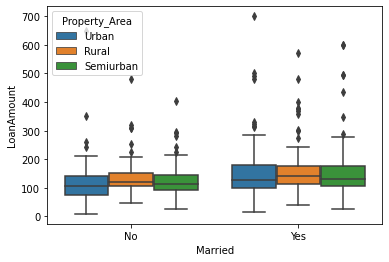

In [23]:
sns.boxplot(x='Married',y='LoanAmount',hue='Property_Area',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

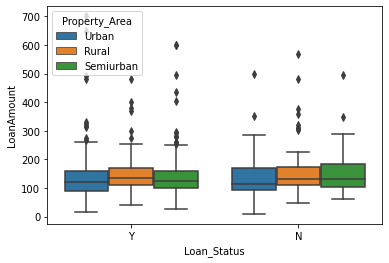

In [307]:
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Property_Area',data=df)

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

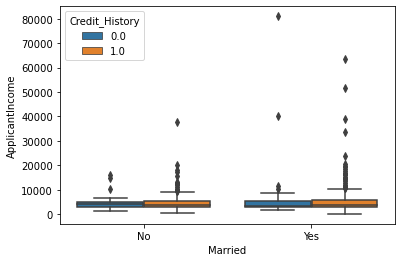

In [24]:
sns.boxplot(x='Married',y='ApplicantIncome',hue='Credit_History',data=df)

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

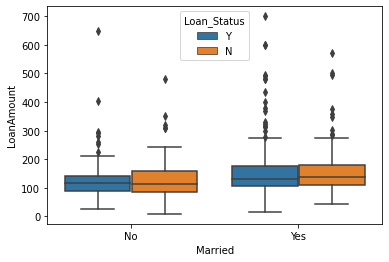

In [293]:
sns.boxplot(x='Married',y='LoanAmount',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

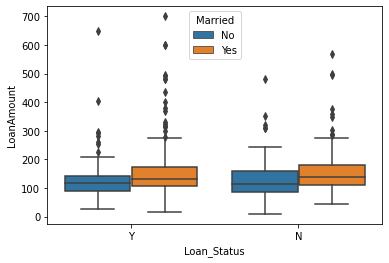

In [308]:
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Married',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

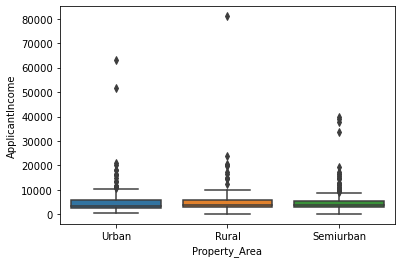

In [25]:
sns.boxplot(x='Property_Area',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

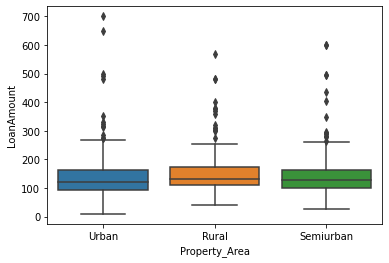

In [150]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [26]:
pd.pivot_table(df,values='LoanAmount',index=['Education','Self_Employed'],columns='Credit_History')

Credit_History                     0.0         1.0
Education    Self_Employed                        
Graduate     No             151.039216  148.332226
             Yes            179.000000  177.479167
Not Graduate No             125.545455  111.591549
             Yes            161.500000  126.615385

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

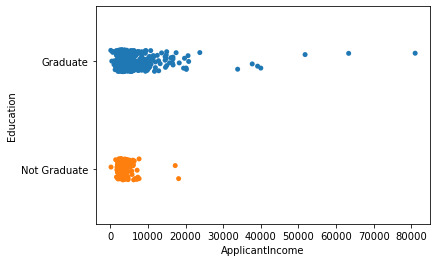

In [27]:
sns.stripplot(x='ApplicantIncome',y='Education',data=df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

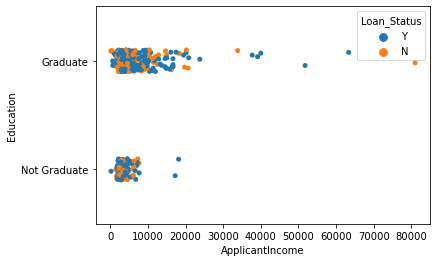

In [292]:
sns.stripplot(x='ApplicantIncome',y='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

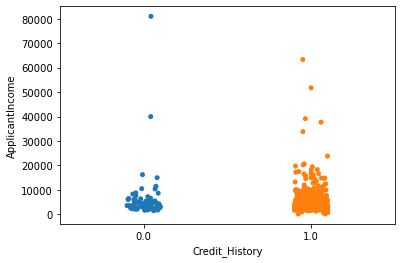

In [28]:
sns.stripplot(y='ApplicantIncome',x='Credit_History',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

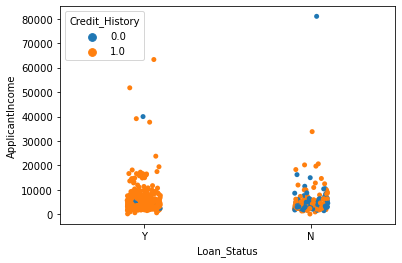

In [291]:
sns.stripplot(y='ApplicantIncome',x='Loan_Status',hue='Credit_History',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

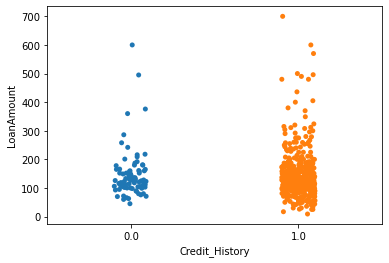

In [29]:
sns.stripplot(y='LoanAmount',x='Credit_History',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

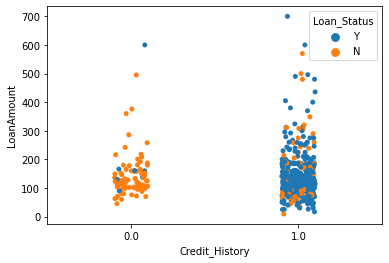

In [286]:
sns.stripplot(y='LoanAmount',x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

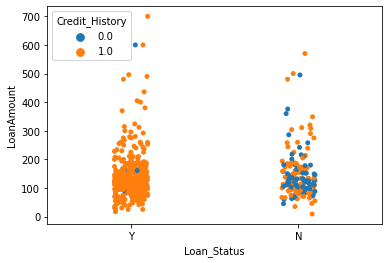

In [303]:
sns.stripplot(y='LoanAmount',x='Loan_Status',hue='Credit_History',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Married'>

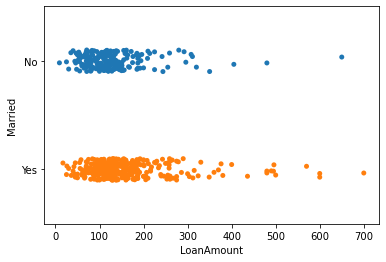

In [30]:
sns.stripplot(x='LoanAmount',y='Married',data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Dependents'>

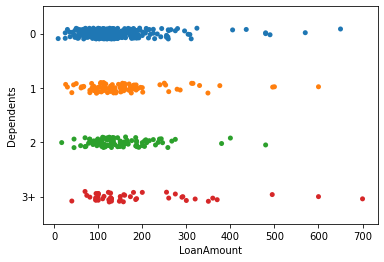

In [31]:
sns.stripplot(x='LoanAmount',y='Dependents',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

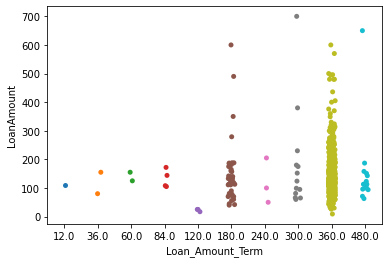

In [32]:
sns.stripplot(x='Loan_Amount_Term',y='LoanAmount',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

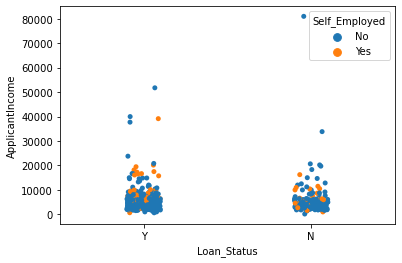

In [305]:
sns.stripplot(x='Loan_Status',y='ApplicantIncome',hue='Self_Employed',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

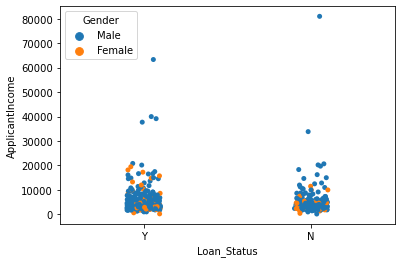

In [306]:
sns.stripplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=df)

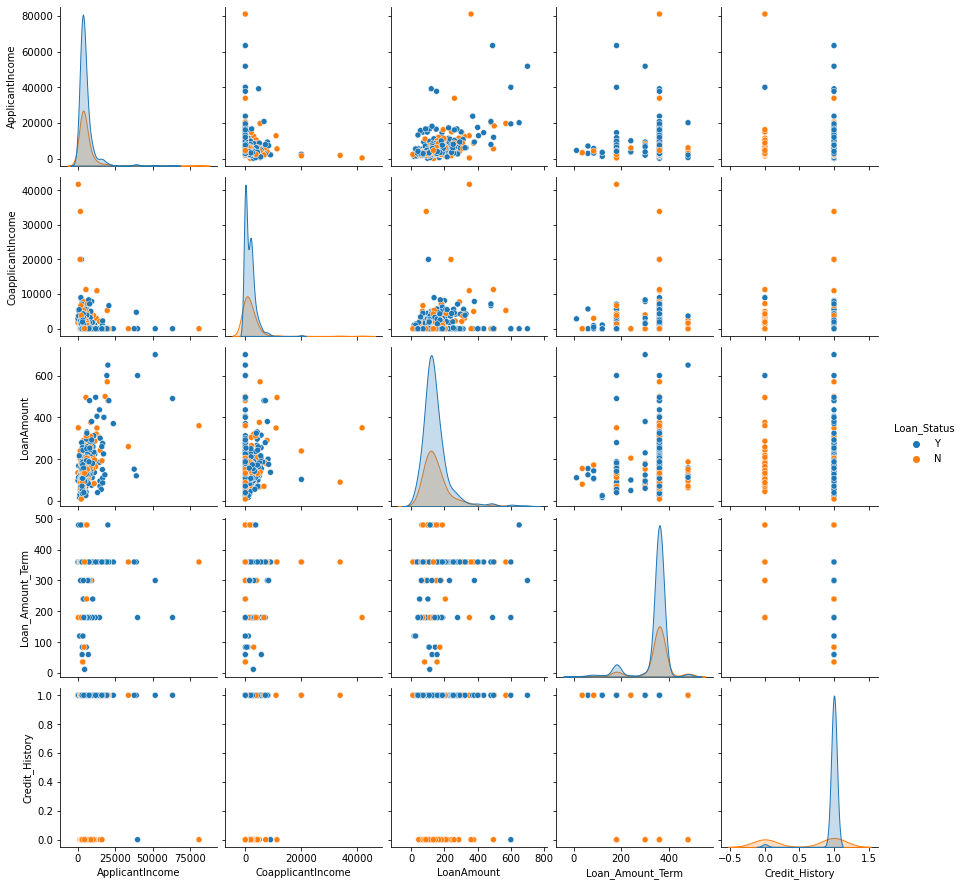

In [310]:
sns.pairplot(df,hue='Loan_Status')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [34]:
info(df)

,number_missing,percent_missing,type,count
Credit_History,50,0.081433,float64,564
Self_Employed,32,0.052117,object,582
LoanAmount,22,0.035831,float64,592
Dependents,15,0.024430,object,599
Loan_Amount_Term,14,0.022801,float64,600
Gender,13,0.021173,object,601
Married,3,0.004886,object,611
Loan_Status,0,0.000000,object,614
Property_Area,0,0.000000,object,614
CoapplicantIncome,0,0.000000,float64,614


### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [207]:
data=copy.deepcopy(df)

In [208]:
data['Credit_History']=data['Credit_History'].fillna(1)

In [209]:
data['Self_Employed']=data['Self_Employed'].fillna('No')

In [210]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].rolling(6,min_periods=1).mean())
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
# df['LoanAmount']=df['LoanAmount'].rolling(6,min_periods=1).mean()

In [211]:
data['Dependents']=data['Dependents'].fillna(0)

In [212]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360)

In [213]:
import random

In [214]:
gender = ['Male','Female']
data['Gender']=data['Gender'].fillna(random.choice(gender))

In [215]:
data['Married']=data['Married'].fillna('No')

In [216]:
data['Dependents']=data['Dependents'].astype(str)

In [ ]:
def Clean(data):
    data['Credit_History']=data['Credit_History'].fillna(1)
    data['Self_Employed']=data['Self_Employed'].fillna('No')
    data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].rolling(6,min_periods=1).mean())
    data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
    data['Dependents']=data['Dependents'].fillna(0)
    data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360)
    gender = ['Male','Female']
    data['Gender']=data['Gender'].fillna(random.choice(gender))
    data['Married']=data['Married'].fillna('No')
    data['Dependents']=data['Dependents'].astype(str)
    return data

In [217]:
info(data)

,number_missing,percent_missing,type,count
Loan_Status,0,0.0,object,614
Property_Area,0,0.0,object,614
Credit_History,0,0.0,float64,614
Loan_Amount_Term,0,0.0,float64,614
LoanAmount,0,0.0,float64,614
CoapplicantIncome,0,0.0,float64,614
ApplicantIncome,0,0.0,int64,614
Self_Employed,0,0.0,object,614
Education,0,0.0,object,614
Dependents,0,0.0,object,614


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

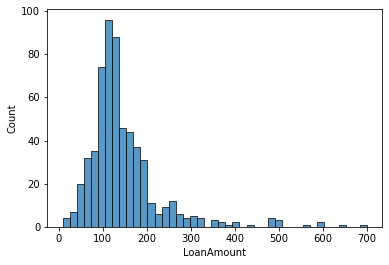

In [45]:
sns.histplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

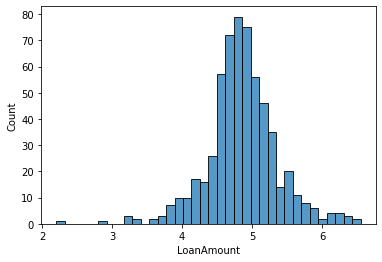

In [296]:
logLA = np.log(df['LoanAmount'])
sns.histplot(logLA)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

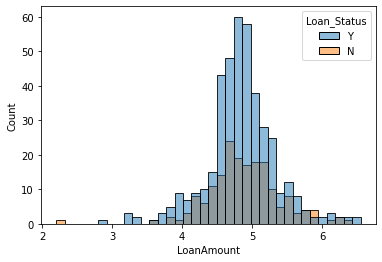

In [299]:
sns.histplot(x=logLA,data=df,hue='Loan_Status')

In [47]:
from scipy.stats import boxcox
boxLA = boxcox(df['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:ylabel='Count'>

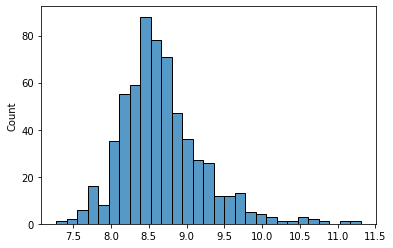

In [300]:
combined_income = df['ApplicantIncome']+df['CoapplicantIncome']
logCI = np.log(combined_income)
sns.histplot(logCI)

[Text(0.5, 0, 'logged income')]

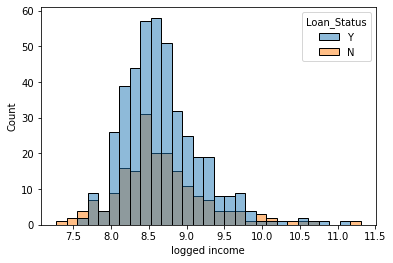

In [302]:
ax = sns.histplot(x=logCI,data=df,hue='Loan_Status')
ax.set(xlabel='logged income')

In [49]:
# data['log_LA']=logLA
# data['log_income']=logCI
# data=data.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

## 4. Building a Predictive Model

In [50]:
info(data)

,number_missing,percent_missing,type,count
Loan_Status,0,0.0,object,614
Property_Area,0,0.0,object,614
Credit_History,0,0.0,float64,614
Loan_Amount_Term,0,0.0,float64,614
LoanAmount,0,0.0,float64,614
CoapplicantIncome,0,0.0,float64,614
ApplicantIncome,0,0.0,int64,614
Self_Employed,0,0.0,object,614
Education,0,0.0,object,614
Dependents,0,0.0,object,614


In [51]:
data = data.fillna(data.mean())

Try paramater grid search to improve the results

In [52]:
data['Dependents'][0]

'0'

In [54]:
import sklearn
sklearn.__version__

'0.24.1'

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [315]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [236]:
data = data.sample(frac=1)

In [237]:
X = data.drop(columns=['Loan_ID','Loan_Status'])
y = data['Loan_Status']

In [238]:
LE = LabelEncoder()
y = LE.fit_transform(y)
# y

In [239]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=123)

In [240]:
numerical = list(X.dtypes[X.dtypes != 'object'].index)
remove = {'Credit_History'}
numerical = [e for e in numerical if e not in remove]
categorical = list(X.dtypes[X.dtypes == 'object'].index)
categorical.extend(['Credit_History'])

In [241]:
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [242]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [243]:
def log_transform(x):
    return np.log(x + 1)
transformer = FunctionTransformer(log_transform)

In [244]:
num_pipe = make_pipeline(
    transformer,
    StandardScaler(),
    SelectKBest(k=2)
)

In [245]:
cat_pipe = make_pipeline(
    OrdinalEncoder(),
)
# handle_unknown='use_encoded_value'

In [246]:
preprocessor = ColumnTransformer(
    transformers = [
        ('continuous', num_pipe, numerical),
        ('categorical', cat_pipe, categorical),
    ]
)

In [ ]:
clean = FunctionTransformer(Clean)

In [247]:
import xgboost as xgb
from xgboost import XGBClassifier

In [248]:
# model_pipe = Pipeline(steps = [
#     ('preprocess', preprocessor),
#     ('clf', RandomForestClassifier(n_estimators = 100,
#                                oob_score = True,
#                                random_state = 123,
#                                n_jobs = -1))
# ])


# model_pipe = imblearn.pipeline.Pipeline(steps = [
#     ('preprocess', preprocessor),
#     ('SMOTE', SMOTE(sampling_strategy='minority', 
#                     n_jobs=-1, 
#                     random_state=123)),
#     ('clf', RandomForestClassifier(n_estimators = 100,
#                                oob_score = True,
#                                random_state = 123,
#                                n_jobs = -1))
# ])



#xgboost
# model_pipe = Pipeline(steps = [
#     ('preprocess', preprocessor),
#     ('clf', XGBClassifier(
#                      learning_rate = 0.1,
#                      use_label_encoder = False,
#                      colsample_bytree = 1,
#                      max_depth = 10, 
#                      reg_alpha = 10,
#                      n_estimators = 100,
#                      n_jobs=-1))
# ])

model_pipe = imblearn.pipeline.Pipeline(steps = [
    ('clean', clean),
    ('preprocess', preprocessor),
    ('SMOTE', SMOTE(sampling_strategy=0.75, 
                    n_jobs=-1, 
                    random_state=123)),
    ('random_under', RandomUnderSampler(sampling_strategy=0.8,
                                       random_state = 123)),
    ('clf', XGBClassifier(objective = 'reg:logistic',
                     learning_rate = 0.1,
                     eval_metric = 'logloss',
                     colsample_bytree = 1,
                     use_label_encoder = False,
                     max_depth = 10, 
                     reg_alpha = 10,
                     n_estimators = 100,
                     n_jobs=-1))
])

In [249]:
model_pipe.fit(x_train, y_train)

train_score = cross_val_score(model_pipe,x_train,y_train,cv=5)
print(f'Train set score: {train_score}')

Train set score: [0.80232558 0.8255814  0.81395349 0.80232558 0.76470588]


In [250]:
y_pred = model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.8054054054054054


In [251]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 21  31]
 [  5 128]]
              precision    recall  f1-score   support

           0       0.81      0.40      0.54        52
           1       0.81      0.96      0.88       133

    accuracy                           0.81       185
   macro avg       0.81      0.68      0.71       185
weighted avg       0.81      0.81      0.78       185



In [252]:
print(metrics.roc_auc_score(y_test, y_pred))

0.6831260844418738


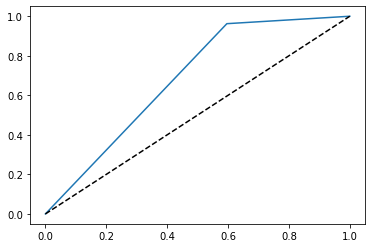

In [253]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [318]:
param_grid = {'clf__objective': ['reg:logistic','binary:logistic'],
              'clf__n_estimators': [50,100,150,200,250,300,350,400,450,500], 
              'clf__learning_rate': [0.003, 0.01,0.03, 0.1, 0.3],
              'clf__reg_alpha': [1,3,5,7,9,11],
              'SMOTE__sampling_strategy': ['minority',0.5,0.6,0.7,0.8,0.9,1],
              'random_under__sampling_strategy': ['majority',0.5,0.6,0.7,0.8,0.9,1]
             }

# for forest
# param_grid = {'clf__n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)], 
#               'clf__min_samples_split': [2, 5, 10],
#               'clf__min_samples_leaf': [1,2,4],
#               'preprocess__continuous__selectkbest__k': [1, 2, 3]}
random = RandomizedSearchCV(model_pipe, param_distributions=param_grid,n_iter=100, cv=5,n_jobs=-1,verbose=1,random_state=123)
random.fit(x_train, y_train)

best_hyperparams = random.best_params_
best_acc = random.score(x_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79242134        nan 0.7272777  0.76692202 0.75759234
 0.71321477 0.76229822        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.80648427
        nan        nan 0.74588235        nan        nan        nan
 0.76445964 0.78087551 0.75280438 0.68287278        nan 0.68528044
        nan 0.80640219        nan        nan 0.71781122 0.79480164
 0.79950752        nan 0.75515732        nan 0.7878249  0.68298222
        nan 0.7272777         nan        nan        nan 0.7878249
 0.75991792 0.76445964 0.7622435  0.74818057 0.70388509        nan
 0.76445964        nan 0.77151847 0.80180575 0.7576197         nan
        nan 0.73652531        nan 0.72008208        nan        nan
 0.75056088 0.75753762        nan 0.78552668 0.75053352 0.77854993
        nan 0.76924761        nan 0.73882353 0.70383037 

Best test set accuracy: 0.8108108108108109
Achieved with hyperparameters: {'random_under__sampling_strategy': 0.5, 'clf__reg_alpha': 11, 'clf__objective': 'reg:logistic', 'clf__n_estimators': 400, 'clf__learning_rate': 0.01, 'SMOTE__sampling_strategy': 0.5}


In [319]:
param_grid = {'clf__objective': ['reg:logistic','binary:logistic'],
              'clf__n_estimators': [300,350,400,450,500], 
              'clf__learning_rate': [0.01, 0.03,0.1],
              'clf__reg_alpha': [9,10,11,12],
              'SMOTE__sampling_strategy': ['minority',0.5,0.6],
              'random_under__sampling_strategy': ['majority',0.5,0.6,0.7]
             }

# for forest
# param_grid = {'clf__n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)], 
#               'clf__min_samples_split': [2, 5, 10],
#               'clf__min_samples_leaf': [1,2,4],
#               'preprocess__continuous__selectkbest__k': [1, 2, 3]}
grid = GridSearchCV(model_pipe, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(x_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best test set accuracy: 0.8108108108108109
Achieved with hyperparameters: {'SMOTE__sampling_strategy': 0.5, 'clf__learning_rate': 0.1, 'clf__n_estimators': 300, 'clf__objective': 'reg:logistic', 'clf__reg_alpha': 9, 'random_under__sampling_strategy': 0.6}


C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.77622435        nan        nan ...        nan 0.80645691 0.80413133]
  warnings.warn(


In [320]:
best_pred = best_model.predict(x_test)

In [321]:
best_accc = metrics.accuracy_score(y_test, best_pred)
print(f'Test set accuracy: {best_accc}')
print(metrics.confusion_matrix(y_test,best_pred))
print(metrics.classification_report(y_test, best_pred))

Test set accuracy: 0.8108108108108109
[[ 20  32]
 [  3 130]]
              precision    recall  f1-score   support

           0       0.87      0.38      0.53        52
           1       0.80      0.98      0.88       133

    accuracy                           0.81       185
   macro avg       0.84      0.68      0.71       185
weighted avg       0.82      0.81      0.78       185



In [198]:
print(metrics.roc_auc_score(y_test, best_pred))

0.7339160839160839


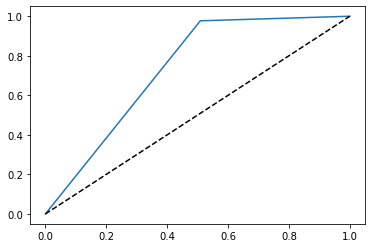

In [199]:
fpr, tpr, threshold = metrics.roc_curve(y_test, best_pred)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [ ]:
# with log transform

# random forest {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 59, 'preprocess__continuous__selectkbest__k': 2}
# train = ~0.8
# test = 0.77

# [[ 30  34]
#  [  9 112]]
#               precision    recall  f1-score   support

#            0       0.77      0.47      0.58        64
#            1       0.77      0.93      0.84       121

#     accuracy                           0.77       185
#    macro avg       0.77      0.70      0.71       185
# weighted avg       0.77      0.77      0.75       185




# random forest + smote
# train = ~0.78
# test = 0.75

# [[ 33  31]
#  [ 15 106]]
#               precision    recall  f1-score   support

#            0       0.69      0.52      0.59        64
#            1       0.77      0.88      0.82       121

#     accuracy                           0.75       185
#    macro avg       0.73      0.70      0.71       185
# weighted avg       0.74      0.75      0.74       185



#xgb
# train = 0.77
# test = 0.76
#               precision    recall  f1-score   support

#            0       0.89      0.39      0.54        64
#            1       0.75      0.98      0.85       121

#     accuracy                           0.77       185
#    macro avg       0.82      0.68      0.70       185
# weighted avg       0.80      0.77      0.74       185

#xgb + smote
# train - 0.82
# test = 0.78

#               precision    recall  f1-score   support

#            0       0.83      0.45      0.59        64
#            1       0.77      0.95      0.85       121

#     accuracy                           0.78       185
#    macro avg       0.80      0.70      0.72       185
# weighted avg       0.79      0.78      0.76       185

# Fitting 5 folds for each of 576 candidates, totalling 2880 fits
# Best test set accuracy: 0.7783783783783784
# Achieved with hyperparameters: {'SMOTE__sampling_strategy': 0.75, 
#                                 'clf__learning_rate': 0.3, 'clf__n_estimators': 50, 'clf__reg_alpha': 7, 'preprocess__continuous__selectkbest__k': 3}






#xgb + smote + randomundersampl
# train = 0.82
# test = 0.8

# [[ 29  26]
#  [  5 125]]
#               precision    recall  f1-score   support

#            0       0.85      0.53      0.65        55
#            1       0.83      0.96      0.89       130

#     accuracy                           0.83       185
#    macro avg       0.84      0.74      0.77       185
# weighted avg       0.84      0.83      0.82       185

# Best test set accuracy: 0.8324324324324325
# Achieved with hyperparameters: {'SMOTE__sampling_strategy': 0.6, 
#                                 'clf__learning_rate': 0.03, 'clf__n_estimators': 50, 'clf__objective': 'reg:logistic', 
#                                 'clf__reg_alpha': 5, 'random_under__sampling_strategy': 0.6}
#     Test set accuracy: 0.8324324324324325
# [[ 27  28]
#  [  3 127]]
#               precision    recall  f1-score   support

#            0       0.90      0.49      0.64        55
#            1       0.82      0.98      0.89       130

#     accuracy                           0.83       185
#    macro avg       0.86      0.73      0.76       185
# weighted avg       0.84      0.83      0.82       185

In [ ]:
# no log

# xgb with smote
# train = 0.74
# test = 0.81

# Fitting 5 folds for each of 576 candidates, totalling 2880 fits
# Best test set accuracy: 0.827027027027027
# Achieved with hyperparameters: {'SMOTE__sampling_strategy': 0.75, 'clf__learning_rate': 0.1, 
#                                 'clf__n_estimators': 50, 'clf__reg_alpha': 7, 'preprocess__continuous__selectkbest__k': 1}
    
# Test set accuracy: 0.827027027027027
# [[ 21  31]
#  [  1 132]]
#               precision    recall  f1-score   support

#            0       0.95      0.40      0.57        52
#            1       0.81      0.99      0.89       133

#     accuracy                           0.83       185
#    macro avg       0.88      0.70      0.73       185
# weighted avg       0.85      0.83      0.80       185


# xgb with smote + randomundersampling
# train = ~0.77
# test = ~0.82

# Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
# Best test set accuracy: 0.8324324324324325
# Achieved with hyperparameters: {'SMOTE__sampling_strategy': 0.5, 'clf__learning_rate': 0.03, 
#                                 'clf__n_estimators': 150, 'clf__reg_alpha': 3, 'preprocess__continuous__selectkbest__k': 3, 
#                                 'random_under__sampling_strategy': 0.5}
#     Test set accuracy: 0.8324324324324325
# [[ 22  30]
#  [  1 132]]
#               precision    recall  f1-score   support

#            0       0.96      0.42      0.59        52
#            1       0.81      0.99      0.89       133

#     accuracy                           0.83       185
#    macro avg       0.89      0.71      0.74       185
# weighted avg       0.85      0.83      0.81       185

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [192]:
# import pickle

In [193]:
# with open('modelpipe.pickle', 'wb') as f:
#     pickle.dump(model_pipe, f)

In [194]:
# with open('bestmodel.pickle', 'wb') as f:
#     pickle.dump(best_model, f)

In [ ]:
# with open('bestmodel.pickle', 'rb') as f:
#     best_model = pickle.load(f) 

In [254]:
x_train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
381,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban


In [267]:
# json_data = {'alcohol': 14.23,
#  'malic_acid': 1.71,
#  'ash': 2.43,
#  'alcalinity_of_ash': 15.6,
#  'magnesium': 127.0,
#  'total_phenols': 2.8,
#  'flavanoids': 3.06,
#  'nonflavanoid_phenols': 0.28,
#  'proanthocyanins': 2.29,
#  'color_intensity': 5.64,
#  'hue': 1.04,
#  'od280/od315_of_diluted_wines': 3.92,
#  'proline': 1065.0}

json_data = {
    'Gender': 'Male',
    'Married': 'No',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5941,
    'CoapplicantIncome': 4232,
    'LoanAmount': 296,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 'Semiurban'
}

In [284]:
import requests
URL = "http://127.0.0.1:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)

In [285]:
print(r.json())

[1]


In [288]:
import requests
URL = "http://54.193.231.4:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)

In [289]:
print(r.json())

[[0.4559327960014343, 0.5440672039985657]]
